# Project 4: Hydrophone Project
Caleb Taing, BME 450, 3/14/2020

### Project 2 Data
Timeframe: 1 Jan, 2018 - 1 Jan, 2019)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json
import pytz
import numpy as np
import requests
import datetime as dt
import time 
from datetime import datetime
import datetime
from pandas.plotting import register_matplotlib_converters
import scipy.stats as ss

In [48]:
USERNAME ='OOIAPI-ZKR5O629PC7ULN'
TOKEN= 'TEMP-TOKEN-UBTCW3TSWEG03J'
DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [49]:
#Time conversion into UTC
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()
pst_delta = 8*3600

def ntp_seconds_to_datetime(ntp_seconds):
    timestamp = datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
    utc_timezone = pytz.timezone('UTC')
    pst_timezone = pytz.timezone('US/Pacific')
    time = utc_timezone.localize(timestamp).astimezone(pst_timezone)
    return time

In [50]:
#Arrays for Cross Correlation
OSSM_time = []
OSSM_velocity = []
OSSM_precipitation = []

OOSM_time = []
OOSM_velocity = []
OOSM_precipitation = []

In [51]:
data_request_url = ['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-01-01T00:31:20.712Z&endDT=2019-01-01T00:31:20.712Z&limit=1000',
                   'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-01-01T04:33:58.629Z&endDT=2019-01-01T04:33:58.629Z&limit=1000']

Oregon Shelf Surface Mooring - Surface Buoy


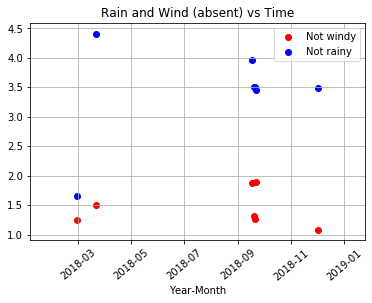

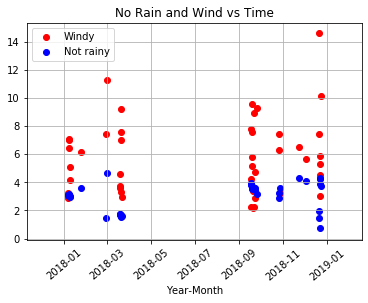

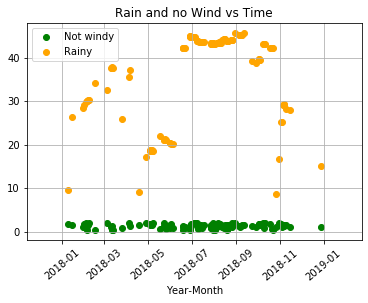

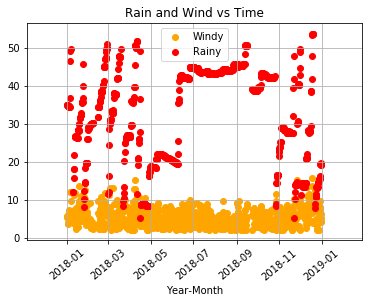

Oregon Offshore Surface Mooring - Surface Buoy


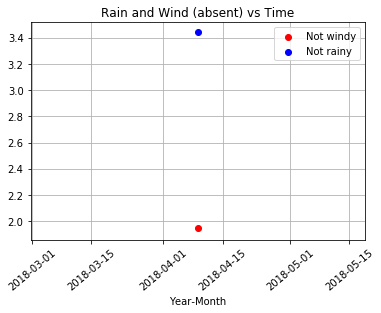

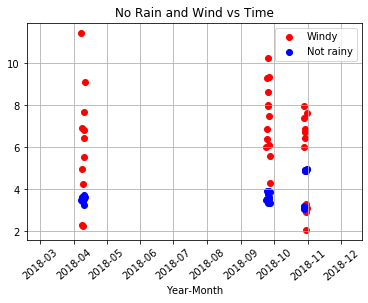

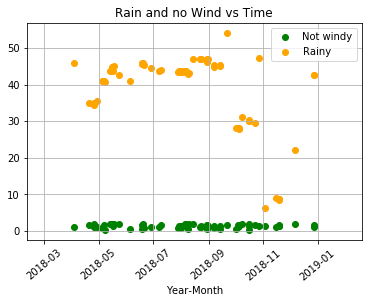

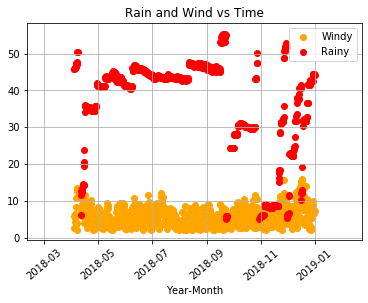

In [52]:
for i in range(len(data_request_url)):
    data_request = requests.get(data_request_url[i], auth=(USERNAME, TOKEN))
    data = data_request.json()
    time = []
    velocity = []
    precipitation = []
    if i == 0:
        print("Oregon Shelf Surface Mooring - Surface Buoy")
    elif i==1:
        print("Oregon Offshore Surface Mooring - Surface Buoy")
    
    for j in range(len(data)):
        time.append(ntp_seconds_to_datetime(data[j]['time']))
        #resultant velocity
        resultant_velocity = np.sqrt((np.square(data[j]['northward_wind_velocity']))+(np.square(data[j]['eastward_wind_velocity'])))
        velocity.append(resultant_velocity)
        precipitation.append(data[j]['precipitation'])
        if i == 0:
            OSSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OSSM_velocity.append(resultant_velocity)
            OSSM_precipitation.append(data[j]['precipitation'])
          
        elif i == 1:
            OOSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OOSM_velocity.append(resultant_velocity)
            OOSM_precipitation.append(data[j]['precipitation'])
            
    
    from numpy import *
    velocity = np.asarray(velocity)
    velocity[isnan(velocity)] = 0
    
    #Case 1: Rain and Wind (absent)
    time1 = []
    velocity1 = []
    precipitation1 = []
     
    #Case 2: No Rain and Wind
    time2 = []
    velocity2 = []
    precipitation2 = []
    
    #Case 3: Rain and no Wind
    time3 = []
    velocity3 = []
    precipitation3 = []
    
    #Case 4: Rain and Wind
    time4 = []
    velocity4 = []
    precipitation4 = []
    
    for i in range(len(time)):
        if velocity[i] < 2 and precipitation[i] < 5:
            #Case 1: Rain and Wind (absent) vs Time
            time1.append(time[i])
            velocity1.append(velocity[i])
            precipitation1.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] < 5:
            #Case 2: No Rain and Wind vs Time
            time2.append(time[i])
            velocity2.append(velocity[i])
            precipitation2.append(precipitation[i])
        elif velocity[i] < 2 and precipitation[i] >= 5:
            #Case 3: Rain and no Wind vs Time
            time3.append(time[i])
            velocity3.append(velocity[i])
            precipitation3.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] >= 5:
            #Case 4: Rain and Wind vs Time
            time4.append(time[i])
            velocity4.append(velocity[i])
            precipitation4.append(precipitation[i])
    #1 Rain and Wind (absent) vs Time
    plt.scatter(time1,velocity1,color = 'red',label = 'Not windy')
    plt.scatter(time1,precipitation1,color = 'blue',label='Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rain and Wind (absent) vs Time')
    plt.grid(True)
    plt.show()
    
    #2 No Rain and Wind vs Time
    plt.scatter(time2,velocity2,color = 'red',label='Windy')
    plt.scatter(time2,precipitation2,color = 'blue',label = 'Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('No Rain and Wind vs Time')
    plt.grid(True)
    plt.show()
    
    #3 Rain and no Wind vs Time
    plt.scatter(time3,velocity3,color = 'green',label='Not windy')
    plt.scatter(time3,precipitation3,color = 'orange',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rain and no Wind vs Time')
    plt.grid(True)
    plt.show()
    
    #4 Rain and Wind vs Time
    plt.scatter(time4,velocity4,color = 'orange', label='Windy')
    plt.scatter(time4,precipitation4,color = 'red',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rain and Wind vs Time')
    plt.grid(True)
    plt.show()

# Time Periods
### Oregon Shelf Surface Mooring *Cases* 
Case 1: Rain and Wind (absent): **Early March 2018**

Case 2: No Rain and Wind: **Late December 2018**

Case 3: Rain and no Wind: **Late May 2018**

Case 4: Rain and Wind: **Early to Mid March 2018**

### Oregon Offshore Mooring *Cases*
Case 1: Rain and Wind (absent): **Early April 2018**

Case 2: No Rain and Wind: **Late September 2018**

Case 3: Rain and no Wind: **Early September 2018**

Case 4: Rain and Wind: **Early December 2018**



### Wind and Rain Noise

In [54]:
import obspy
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime

%matplotlib inline

# Oregon Shelf Cabled
### Case 1: Rain and Wind (absent): Early April 2018

In [72]:
# 2nd March, 2018
data_url_1 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2018/03/02/OO-HYEA2--YDH-2018-03-02T12:55:48.141000.mseed'

st1 = read(data_url_1)
st1[0].stats

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2018-03-02T12:55:48.141000Z
         endtime: 2018-03-02T12:55:48.390984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 16000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 36864})

In [68]:
fs1 = st1[0].stats.sampling_rate
print(fs1)

64000.0


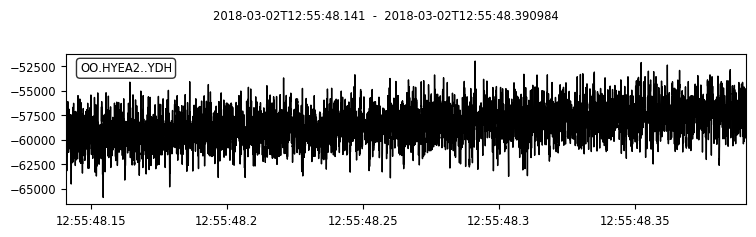

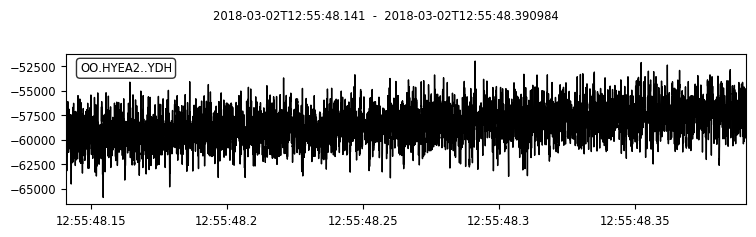

(0, 15000)

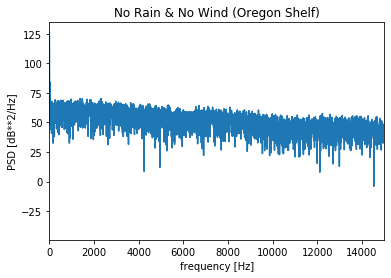

In [74]:
st1[0].plot()

# slicing time
t_start1 = st1[0].stats.starttime 
t_end1 = st1[0].stats.starttime + 1  # one sec
sliced1 = st1.slice(t_start1, t_end1)
sliced1.plot()

from scipy.fftpack import fft
x1 = (sliced1[0].data)*np.hanning(len(sliced1[0].data))
xfft1 = 2*np.square(fft(x1,64000))/(len(x1)*fs1) 
fre1 = np.linspace(1,fs1,64000)
data_db1 = 10*np.log10(np.abs(xfft1))+169-128.9
plt.plot(fre1[0:32000], data_db1[0:32000],label='PSD')
plt.title('No Rain & No Wind (Oregon Shelf)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

### Case 2: No Rain and Wind: Late December 2018

In [79]:
data_url_2 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2018/12/21/OO-HYEA2--YDH-2018-12-21T13:20:00.000015.mseed'
st2 = read(data_url_2)
st2[0].stats

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2018-12-21T13:20:00.000015Z
         endtime: 2018-12-21T13:24:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 7302, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 29908992})

In [80]:
fs2 = st2[0].stats.sampling_rate
print(fs2)

64000.0


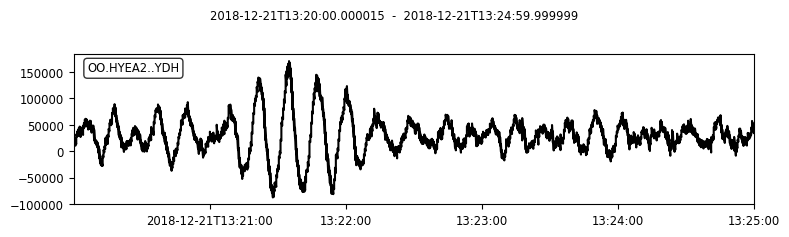

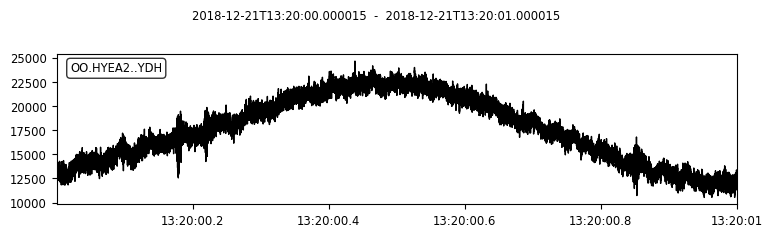

(0, 15000)

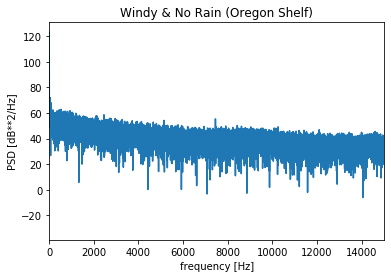

In [81]:
st2[0].plot()

# slicing time
t_start2 = st2[0].stats.starttime 
t_end2 = st2[0].stats.starttime + 1
sliced2 = st2.slice(t_start2, t_end2)
sliced2.plot()

from scipy.fftpack import fft
x2 = (sliced2[0].data)*np.hanning(len(sliced2[0].data))
xfft2 = 2*np.square(fft(x2,64000))/(len(x2)*fs2)
fre2 = np.linspace(1,fs2,64000)
data_db2 = 10*np.log10(np.abs(xfft2))+169-128.9
plt.plot(fre2[0:32000], data_db2[0:32000],label='PSD')
plt.title('Windy & No Rain (Oregon Shelf)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

### Case 3: Rain and no Wind: Late May 2018

In [82]:
data_url_3 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2018/05/25/OO-HYEA2--YDH-2018-05-25T17:03:56.437563.mseed'
#localFileName = '../data/merged_hydrophone.mseed'
st3 = read(data_url_3)
st3[0].stats

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2018-05-25T17:03:56.437563Z
         endtime: 2018-05-25T17:04:03.187547Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 432000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 200, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 819200})

In [83]:
fs3 = st3[0].stats.sampling_rate
print(fs3)

64000.0


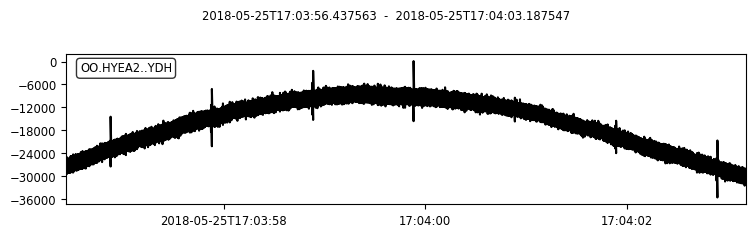

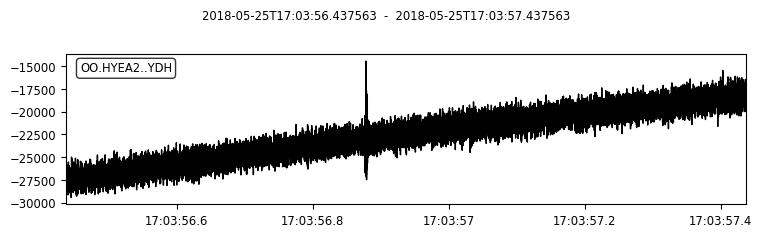

(0, 15000)

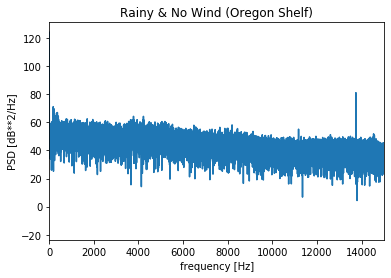

In [84]:
st3[0].plot() #all 5 mins

# slicing time
t_start3 = st3[0].stats.starttime 
t_end3 = st3[0].stats.starttime + 1
sliced3 = st3.slice(t_start3, t_end3)
sliced3.plot()

from scipy.fftpack import fft
x3 = (sliced3[0].data)*np.hanning(len(sliced3[0].data))
xfft3 = 2*np.square(fft(x3,64000))/(len(x3)*fs3)
fre3 = np.linspace(1,fs3,64000)
data_db3 = 10*np.log10(np.abs(xfft3))+169-128.9
plt.plot(fre3[0:32000], data_db3[0:32000],label='PSD')
plt.title('Rainy & No Wind (Oregon Shelf)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

### Case 4: Rain and Wind: Early to Mid March 2018

In [112]:
data_url_4 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2018/03/07/OO-HYEA2--YDH-2018-03-07T09:13:33.100688.mseed'
#localFileName = '../data/merged_hydrophone.mseed'
st4 = read(data_url_4)
st4[0].stats

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2018-03-07T09:13:33.100688Z
         endtime: 2018-03-07T09:13:34.850672Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 112000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 40, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 163840})

In [113]:
fs4 = st4[0].stats.sampling_rate
print(fs4)

64000.0


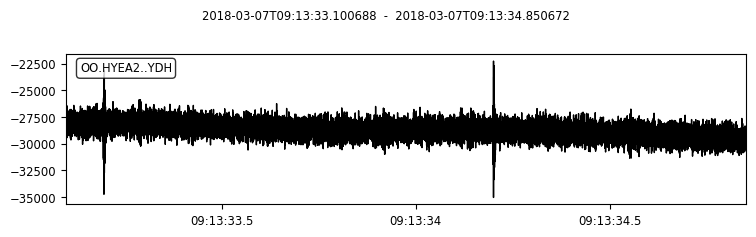

In [114]:
st4[0].plot()

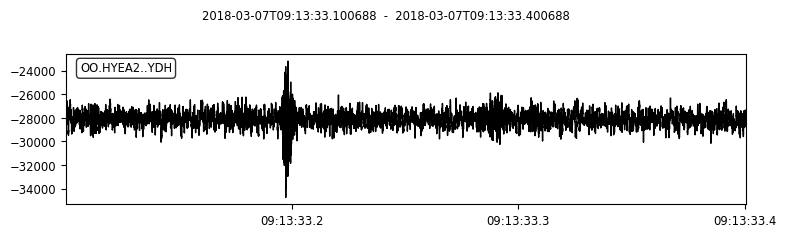

(0, 15000)

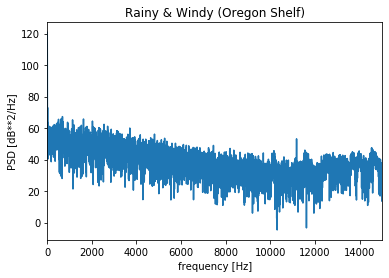

In [119]:


# slicing time
t_start4 = st4[0].stats.starttime 
t_end4 = st4[0].stats.starttime + 0.3
sliced4 = st4.slice(t_start4, t_end4)
sliced4.plot()

from scipy.fftpack import fft
x4 = (sliced4[0].data)*np.hanning(len(sliced4[0].data))
xfft4 = 2*np.square(fft(x4,64000))/(len(x4)*fs4)
fre4 = np.linspace(1,fs4,64000)
data_db4 = 10*np.log10(np.abs(xfft4))+169-128.9
plt.plot(fre4[0:32000], data_db4[0:32000],label='PSD')
plt.title('Rainy & Windy (Oregon Shelf)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

##### 

# Oregon Offshore Cabled
### Case 1: Rain and Wind (absent): Early April 2018

In [66]:
data_url_5 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/04/09/OO-HYEA1--YDH-2018-04-09T00:00:00.000000.mseed'

st5 = read(data_url_5)
st5[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2018-04-09T00:00:00.000000Z
         endtime: 2018-04-09T00:04:59.999984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9835, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 40284160})

In [58]:
fs5 = st5[0].stats.sampling_rate
print(fs5)

64000.0


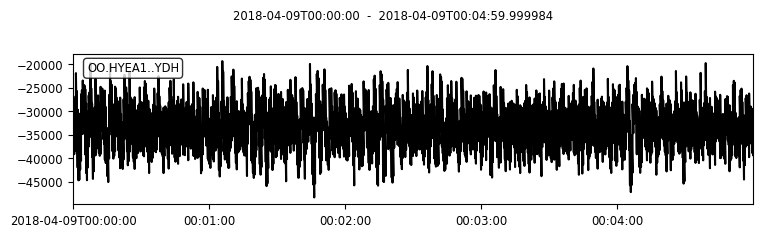

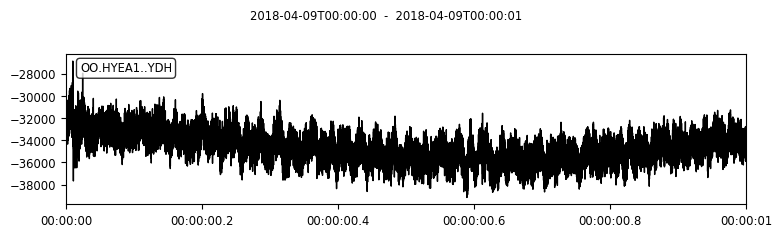

(0, 15000)

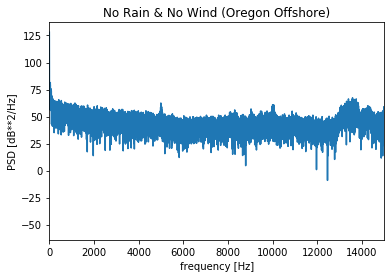

In [91]:
st5[0].plot()

# slicing time
t_start5 = st5[0].stats.starttime 
t_end5 = st5[0].stats.starttime + 1
sliced5 = st5.slice(t_start5, t_end5)
sliced5.plot()

from scipy.fftpack import fft
x5 = (sliced5[0].data)*np.hanning(len(sliced5[0].data))
xfft5 = 2*np.square(fft(x5,64000))/(len(x5)*fs5)
fre5 = np.linspace(1,fs5,64000)
data_db5 = 10*np.log10(np.abs(xfft5))+169-128.9
plt.plot(fre5[0:32000], data_db5[0:32000],label='PSD')
plt.title('No Rain & No Wind (Oregon Offshore)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

### Case 2: No Rain and Wind: **Late September 2018**

In [92]:
data_url_5 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/09/26/OO-HYEA1--YDH-2018-09-26T02:05:00.000016.mseed'
#localFileName = '../data/merged_hydrophone.mseed'
st5 = read(data_url_5)
st5[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2018-09-26T02:05:00.000016Z
         endtime: 2018-09-26T02:10:00.002000Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200128
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9484, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 38846464})

In [93]:
fs5 = st5[0].stats.sampling_rate
print(fs5)

64000.0


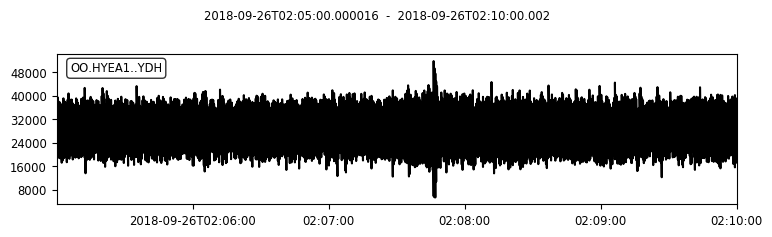

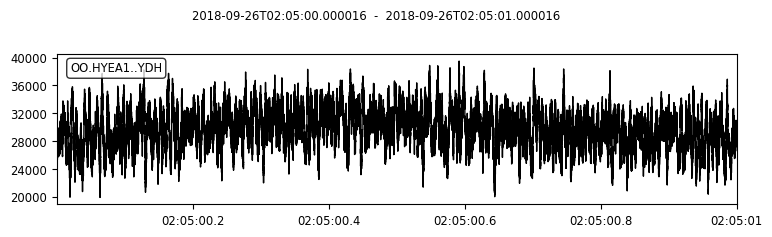

(0, 15000)

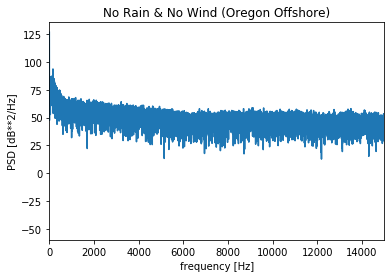

In [94]:
st5[0].plot()

# slicing time
t_start5 = st5[0].stats.starttime 
t_end5 = st5[0].stats.starttime + 1
sliced5 = st5.slice(t_start5, t_end5)
sliced5.plot()

from scipy.fftpack import fft
x5 = (sliced5[0].data)*np.hanning(len(sliced5[0].data))
xfft5 = 2*np.square(fft(x5,64000))/(len(x5)*fs5)
fre5 = np.linspace(1,fs5,64000)
data_db5 = 10*np.log10(np.abs(xfft5))+169-128.9
plt.plot(fre5[0:32000], data_db5[0:32000],label='PSD')
plt.title('No Rain & No Wind (Oregon Offshore)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

### Case 3: Rain and no Wind: **Early September 2018**

In [101]:
data_url_7 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/09/04/OO-HYEA1--YDH-2018-09-04T18:45:00.000015.mseed'
#localFileName = '../data/merged_hydrophone.mseed'
st7 = read(data_url_7)
st7[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2018-09-04T18:45:00.000015Z
         endtime: 2018-09-04T18:49:59.998984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19199935
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9473, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 38801408})

In [102]:
fs7 = st7[0].stats.sampling_rate
print(fs7)

64000.0


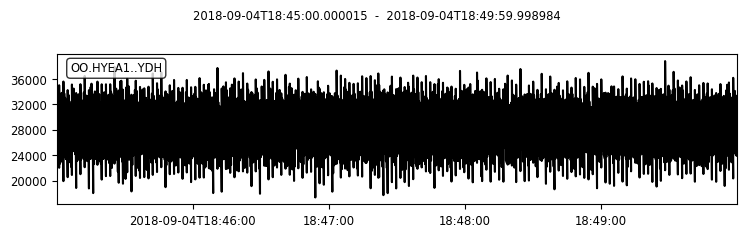

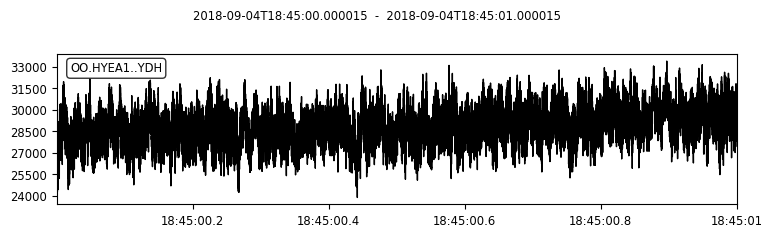

Text(0, 0.5, 'PSD [dB]')

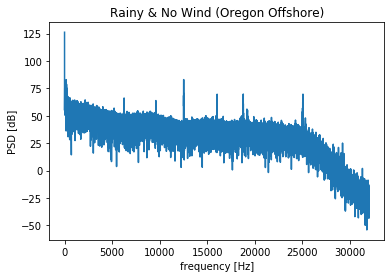

In [104]:
st7[0].plot()

# slicing time
t_start7 = st7[0].stats.starttime 
t_end7 = st7[0].stats.starttime + 1
sliced7 = st7.slice(t_start7, t_end7)
sliced7.plot()

from scipy.fftpack import fft
x7 = (sliced7[0].data)*np.hanning(len(sliced7[0].data))
xfft7 = 2*np.square(fft(x7,64000))/(len(x7)*fs7)
fre7 = np.linspace(1,fs7,64000)
data_db7 = 10*np.log10(np.abs(xfft7))+169-128.9
plt.plot(fre7[0:32000], data_db7[0:32000],label='PSD')
plt.title('Rainy & No Wind (Oregon Offshore)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB]')

### Case 4: Rain and Wind: **Early December 2018**

In [98]:
data_url_8 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/12/12/OO-HYEA1--YDH-2018-12-12T21:05:00.251250.mseed'
#localFileName = '../data/merged_hydrophone.mseed'

st8 = read(data_url_8)
st8[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2018-12-12T21:05:00.251250Z
         endtime: 2018-12-12T21:09:59.997672Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19183772
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9162, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 37527552})

In [99]:
fs8 = st8[0].stats.sampling_rate
print(fs8)

64000.0


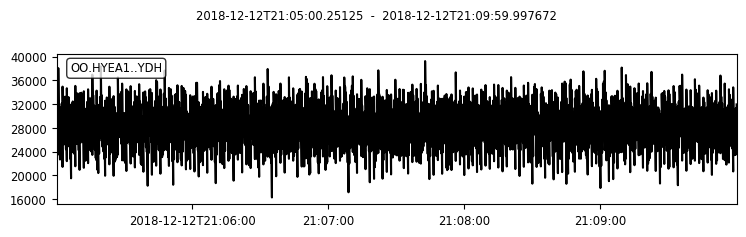

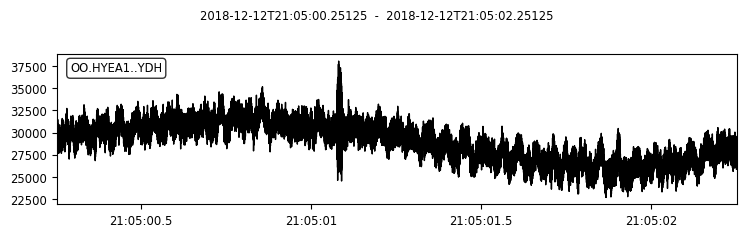

(0, 15000)

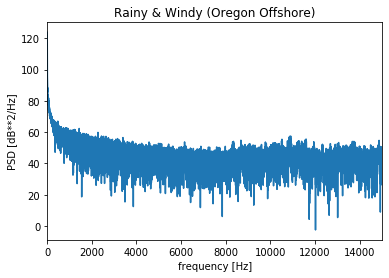

In [100]:
st8[0].plot()

# slicing time
t_start8 = st8[0].stats.starttime 
t_end8 = st8[0].stats.starttime + 2
sliced8 = st8.slice(t_start8, t_end8)
sliced8.plot()

from scipy.fftpack import fft
x8 = (sliced8[0].data)*np.hanning(len(sliced8[0].data))
xfft8 = 2*np.square(fft(x8,64000))/(len(x8)*fs8)
fre8 = np.linspace(1,fs8,64000)
data_db8 = 10*np.log10(np.abs(xfft8))+169-128.9
plt.plot(fre8[0:32000], data_db8[0:32000],label='PSD')
plt.title('Rainy & Windy (Oregon Offshore)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

## Airgun, Marine Mammals, Earthquake/Volcano Noise

In [179]:
data_url_9= 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T07:45:00.000000.mseed'
#airgun - Axial Base Seafloor, 2019-08-01T07:45:00.000000
#Taken from announcements

data_url_10= 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T19:55:00.000015.mseed'
#marine mammal - Oregon Slope Base Seafloor, 2017-10-06T19:55:00.000015Z
#Taken from Project 4 lecture

data_url_11= 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/04/25/OO-AXVM1--YDH-2019-04-25T06:35:00.000015.mseed'
#volcano - Axial Seamount, 
#Taken from http://axial.ocean.washington.edu/

### Airgun

In [180]:
st9 = read(data_url_9)
st9[0].stats

         network: OO
         station: AXVM1
        location: 
         channel: YDH
       starttime: 2019-08-01T07:45:00.000000Z
         endtime: 2019-08-01T07:49:59.999000Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19199937
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9049, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 37064704})

In [181]:
fs9 = st9[0].stats.sampling_rate
print(fs9)

64000.0


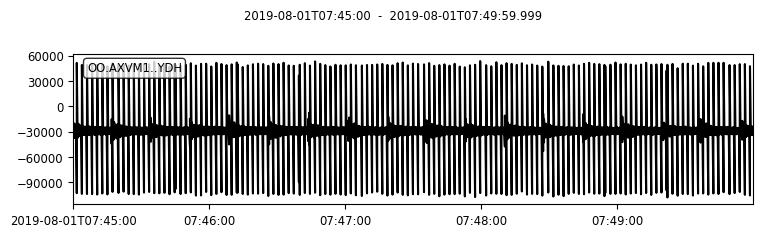

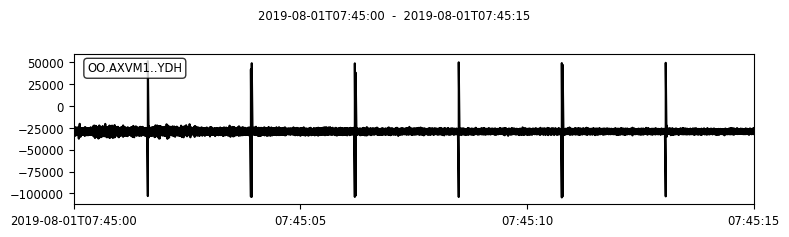

In [182]:
st9[0].plot()

# slice time
t_start9 = st9[0].stats.starttime 
t_end9 = st9[0].stats.starttime + 15
sliced9 = st9.slice(t_start9, t_end9)
sliced9.plot()

6400


(0, 5000)

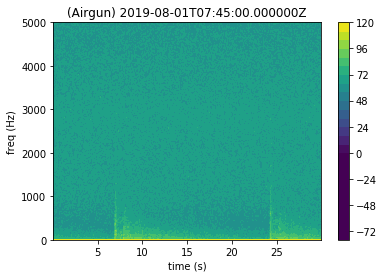

In [183]:
t_start9 = st9[0].stats.starttime + 10
t_end9 = st9[0].stats.starttime + 40
sliced9 = st9.slice(t_start9, t_end9)

npts9 = len(sliced9[0])
end9 = npts9 / fs9
nfft9 = int(fs9/10)  # number of fft points of each bin
print(nfft9)
per_lap9 = 0.90      # percentage of overlap
nlap9 = int(nfft9 * float(per_lap9))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram9, freq9, time9 = mlab.specgram(sliced9[0].data,NFFT = nfft9,Fs = fs9,noverlap = nlap9, pad_to = None)
specgram9 = 10 * np.log10(specgram9) +169-128.9
plt.contourf(time9,freq9,specgram9,30,vmin=0, vmax=120)
plt.title('(Airgun) 2019-08-01T07:45:00.000000Z')
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

### Marine Mammals (2017-10-06)

In [184]:
st10 = read(data_url_10)
st10[0].stats

         network: OO
         station: HYVM1
        location: 
         channel: YDH
       starttime: 2017-10-06T19:55:00.000015Z
         endtime: 2017-10-06T19:59:59.997999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19199872
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6404, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 26230784})

In [185]:
fs10 = st10[0].stats.sampling_rate
print(fs10)

64000.0


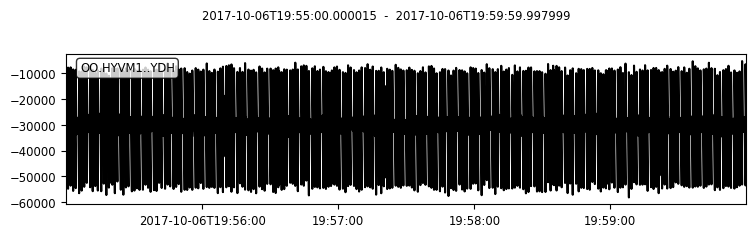

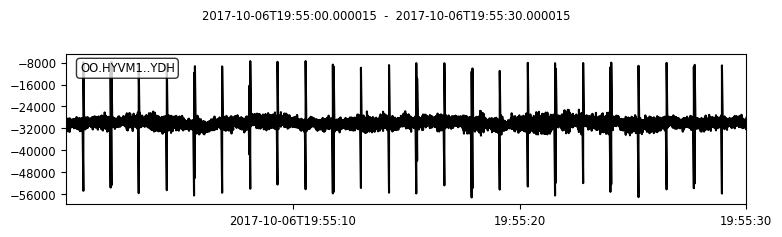

In [186]:
st10[0].plot()

# slice time
t_start10 = st10[0].stats.starttime 
t_end10 = st10[0].stats.starttime + 30
sliced10 = st10.slice(t_start10, t_end10)
sliced10.plot()

4571


(0, 5000)

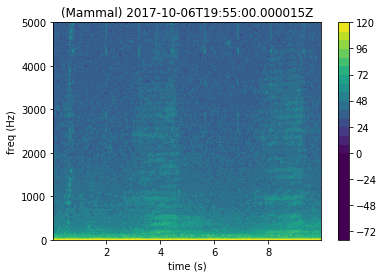

In [192]:
t_start10 = st10[0].stats.starttime
t_end10 = st10[0].stats.starttime + 10
sliced10 = st10.slice(t_start10, t_end10)


npts10 = len(sliced10[0])
end10 = npts10 / fs10
nfft10 = int(fs10/14)  # number of fft points of each bin
print(nfft10)
per_lap10 = 0.90      # percentage of overlap
nlap10 = int(nfft10 * float(per_lap10))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram10, freq10, time10 = mlab.specgram(sliced10[0].data,NFFT = nfft10,Fs = fs10,noverlap = nlap10, pad_to = None)
specgram10 = 10 * np.log10(specgram10) +169-128.9
plt.contourf(time10,freq10,specgram10,30,vmin=0, vmax=120)
plt.title('(Mammal) 2017-10-06T19:55:00.000015Z')
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

### Earthquake/ Volcano

In [188]:
st11 = read(data_url_11)
st11[0].stats

         network: OO
         station: AXVM1
        location: 
         channel: YDH
       starttime: 2019-04-25T06:35:00.000015Z
         endtime: 2019-04-25T06:39:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 7491, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 30683136})

In [189]:
fs11 = st11[0].stats.sampling_rate
print(fs11)

64000.0


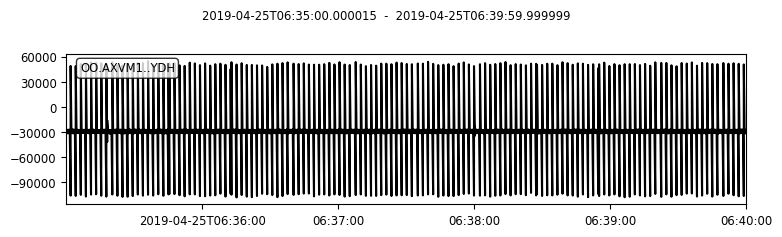

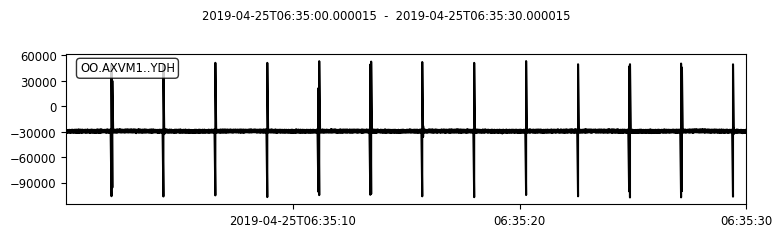

In [190]:
st11[0].plot()

# slice time
t_start11 = st11[0].stats.starttime 
t_end11 = st11[0].stats.starttime + 30

sliced11 = st11.slice(t_start11, t_end11)
sliced11.plot()

4000


(0, 150)

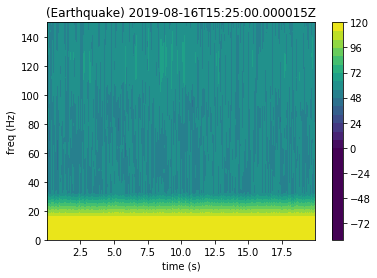

In [191]:
t_start11 = st11[0].stats.starttime +15
t_end11 = st11[0].stats.starttime + 35
sliced11 = st11.slice(t_start11, t_end11)

npts11 = len(sliced11[0])
end11 = npts11 / fs11
nfft11 = int(fs11/16)  # number of fft points of each bin
print(nfft11)
per_lap11 = 0.90      # percentage of overlap
nlap11 = int(nfft11 * float(per_lap11))   # Total Overlapped samples

# using mlab to create the array of spectrogram 
specgram11, freq11, time11 = mlab.specgram(sliced11[0].data,NFFT = nfft11,Fs = fs11,noverlap = nlap11, pad_to = None)
specgram11 = 10 * np.log10(specgram11) +169-128.9
plt.contourf(time11,freq11,specgram11,30,vmin=0, vmax=120)
plt.title('(Earthquake) 2019-04-25T06:35:00.000015Z')
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,150)